In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

This data set includes 800 Pokemon, including their number(#), name, first and second type, the stat total and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed, generation, and legendary status.
    
    This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

#: The ID for each pokemon

Name: The name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: Sum of all stats that come after this, a general guide to how strong a pokemon is

HP: Hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: The base modifier for normal attacks (eg. Scratch, Punch)

Defense: The base damage resistance against normal attacks

SP Atk: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: Special defense, the base damage resistance against special attacks

Speed: Determines which pokemon attacks first each round

Generation: The generation of games where the pokemon was first introduced

Legendary: Some pokemon are much rarer than others, and are dubbed "legendary"

In [2]:
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
df = df.drop(['Type 2'], axis = 1)

In [5]:
df.rename(columns = {'Type 1':'Type'},inplace = True)

In [6]:
df.head()

,#,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,39,52,43,60,50,65,1,False


In [7]:
df = df.dropna(subset=['#'])

In [8]:
df = df.dropna(subset=['Name'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           799 non-null    int64 
 1   Name        799 non-null    object
 2   Type        799 non-null    object
 3   HP          799 non-null    int64 
 4   Attack      799 non-null    int64 
 5   Defense     799 non-null    int64 
 6   Sp. Atk     799 non-null    int64 
 7   Sp. Def     799 non-null    int64 
 8   Speed       799 non-null    int64 
 9   Generation  799 non-null    int64 
 10  Legendary   799 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 69.4+ KB


In [10]:
df['Type'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64

In [11]:
df['Legendary'].value_counts()

False    734
True      65
Name: Legendary, dtype: int64

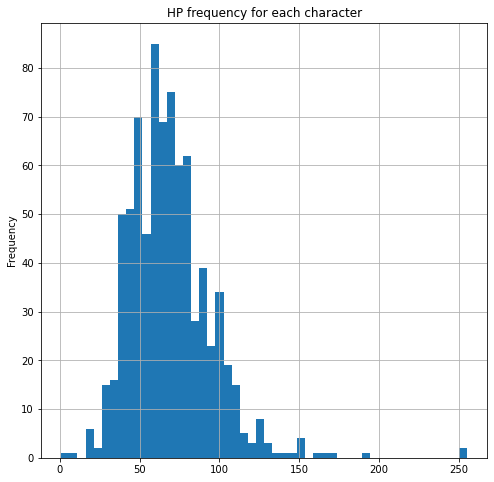

In [12]:
df['HP'].plot(kind = 'hist',bins = 50,figsize = (8,8))
plt.title("HP frequency for each character")
plt.grid()
plt.show()

In [13]:
Type_legendary = pd.crosstab(df['Type'],df['Legendary'])
Type_legendary

Legendary,False,True
Type,,
Bug,69,0
Dark,29,2
Dragon,20,12
Electric,40,4
Fairy,16,1
Fighting,26,0
Fire,47,5
Flying,2,2
Ghost,30,2


In [14]:
print(Type_legendary.sum(), '\n')
print(Type_legendary.shape, '\n')

Legendary
False    734
True      65
dtype: int64 

(18, 2) 



In [15]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(Type_legendary)

In [16]:
# interpret p-value
alpha = 0.05
print("p value is "+str(p))
if p<=alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 5.546165161464294e-12
Dependent (reject H0)


In [17]:
expected

array([[ 63.38673342,   5.61326658],
       [ 28.47809762,   2.52190238],
       [ 29.39674593,   2.60325407],
       [ 40.42052566,   3.57947434],
       [ 15.61702128,   1.38297872],
       [ 23.88485607,   2.11514393],
       [ 47.76971214,   4.23028786],
       [  3.67459324,   0.32540676],
       [ 29.39674593,   2.60325407],
       [ 64.30538173,   5.69461827],
       [ 29.39674593,   2.60325407],
       [ 22.04755945,   1.95244055],
       [ 90.02753442,   7.97246558],
       [ 25.72215269,   2.27784731],
       [ 52.36295369,   4.63704631],
       [ 40.42052566,   3.57947434],
       [ 24.80350438,   2.19649562],
       [102.88861076,   9.11138924]])

In [18]:
df.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097539,0.104312,0.094016,0.088609,0.085585,0.013890,0.983388,0.154006
HP,0.097539,1.000000,0.422731,0.239563,0.362339,0.378711,0.176241,0.058463,0.273577
Attack,0.104312,0.422731,1.000000,0.439364,0.396953,0.264165,0.380671,0.052942,0.345864
Defense,0.094016,0.239563,0.439364,1.000000,0.223380,0.510773,0.015748,0.041697,0.246256
Sp. Atk,0.088609,0.362339,0.396953,0.223380,1.000000,0.506138,0.473766,0.035797,0.448829
Sp. Def,0.085585,0.378711,0.264165,0.510773,0.506138,1.000000,0.259350,0.028401,0.363933
Speed,0.013890,0.176241,0.380671,0.015748,0.473766,0.259350,1.000000,-0.021547,0.327249
Generation,0.983388,0.058463,0.052942,0.041697,0.035797,0.028401,-0.021547,1.000000,0.079374
Legendary,0.154006,0.273577,0.345864,0.246256,0.448829,0.363933,0.327249,0.079374,1.000000


In [19]:
Type_Generation = pd.crosstab(df['Type'],df['Generation'])
Type_Generation

Generation,1,2,3,4,5,6
Type,,,,,,
Bug,14,12,12,10,18,3
Dark,0,6,6,3,13,3
Dragon,3,0,12,4,9,4
Electric,9,7,5,12,8,3
Fairy,2,5,0,1,0,9
Fighting,6,2,5,3,7,3
Fire,14,8,8,5,9,8
Flying,0,0,0,0,2,2
Ghost,4,1,5,7,5,10


In [20]:
print(Type_Generation.sum(), '\n')
print(Type_Generation.shape, '\n')

Generation
1    165
2    106
3    160
4    121
5    165
6     82
dtype: int64 

(18, 6) 



In [21]:
df['Speed'].value_counts()

50     46
60     44
70     37
65     36
30     35
       ..
39      1
24      1
82      1
113     1
123     1
Name: Speed, Length: 108, dtype: int64

Text(0.5, 1.0, 'Distribution of Generation')

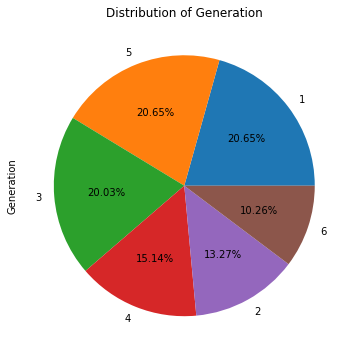

In [22]:
df['Generation'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Generation")

In [23]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

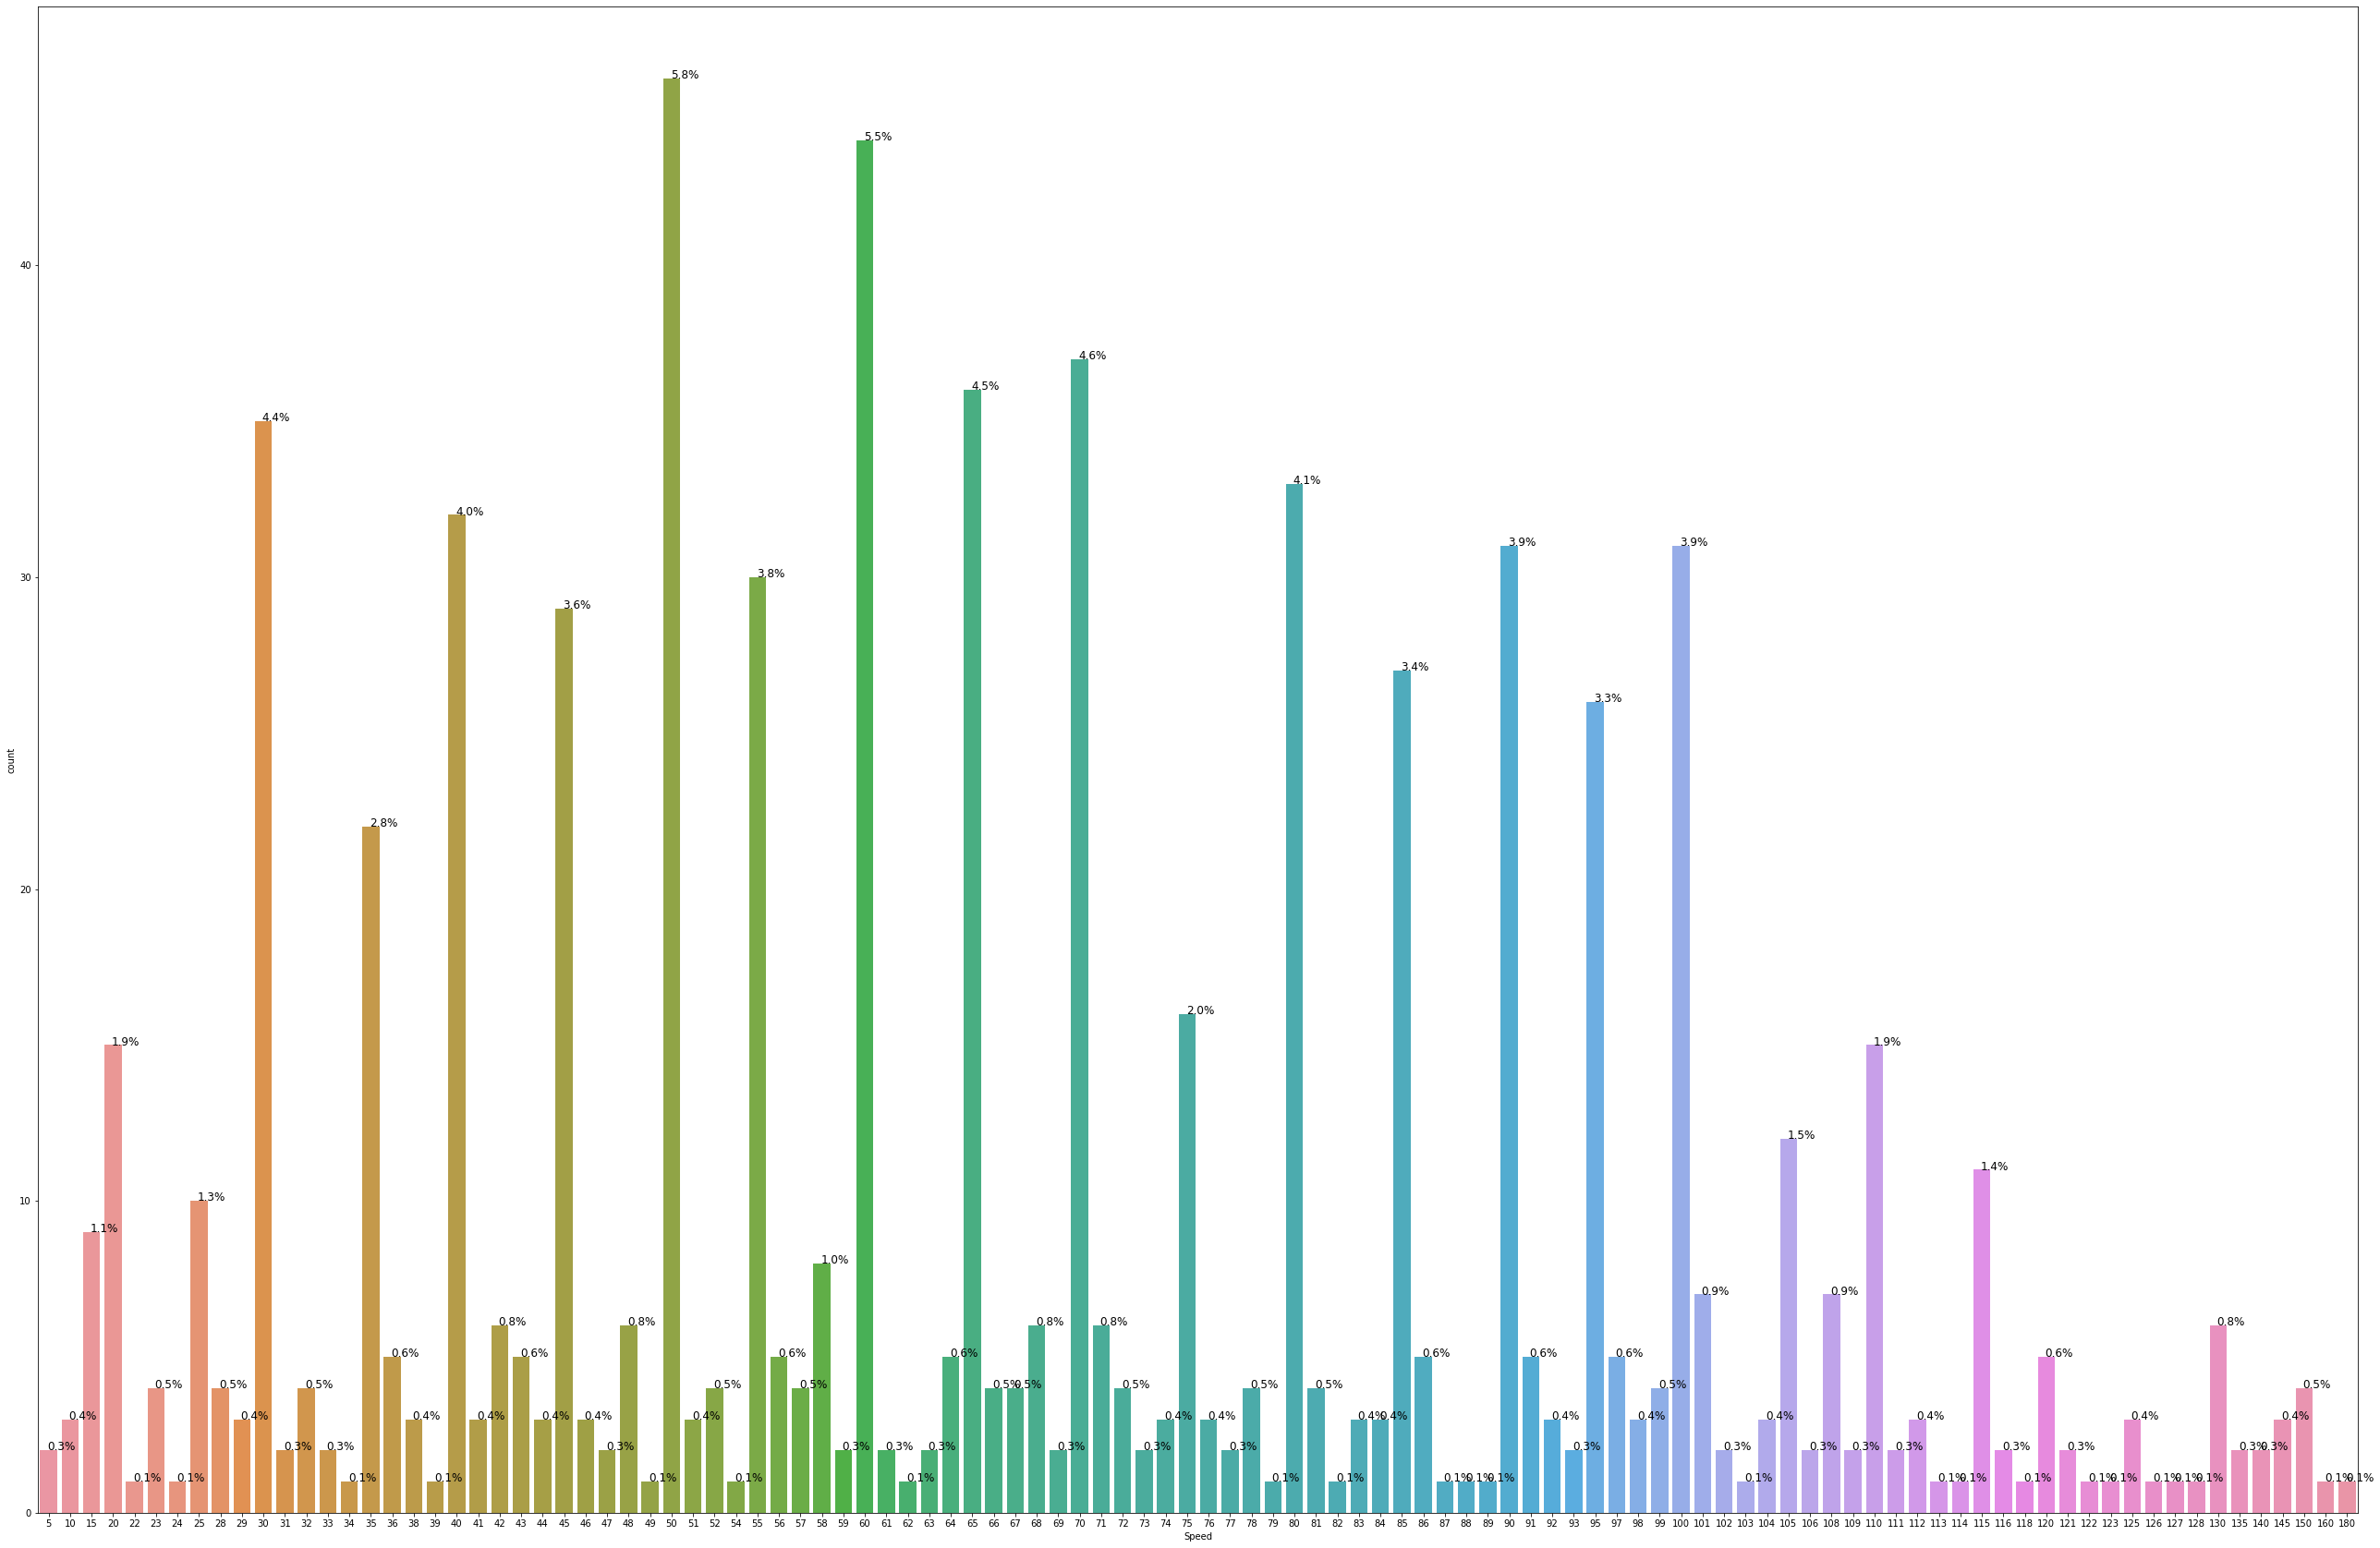

In [24]:
plt.figure(figsize=(45,30))
ax = sns.countplot(x='Speed', data=df)
without_hue(ax, df['Speed'])

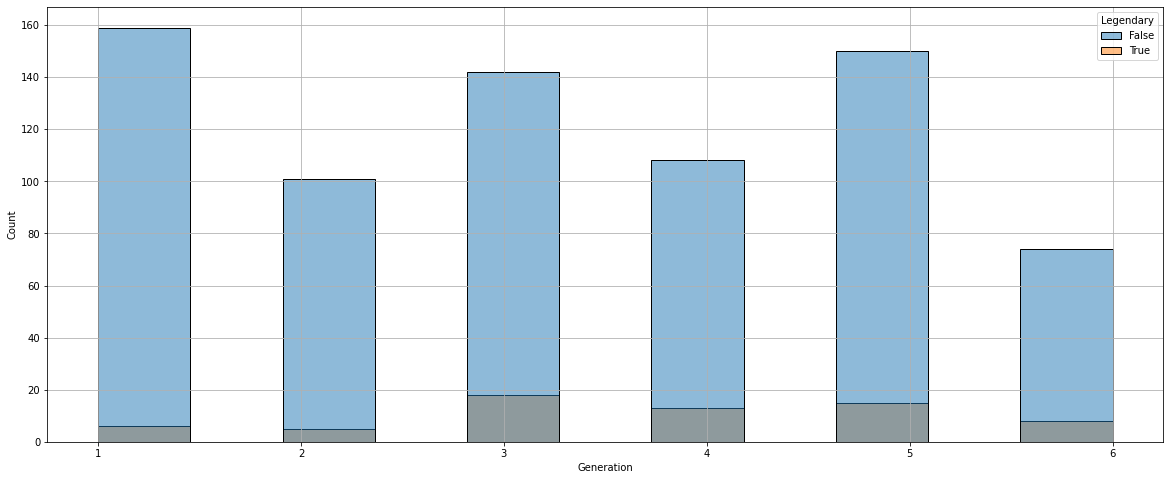

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Generation', hue = 'Legendary',data=df,ax=ax)
plt.grid()

In [26]:
df['Sp. Def'].value_counts()

80     52
50     50
55     47
65     44
60     43
       ..
23      1
230     1
31      1
64      1
113     1
Name: Sp. Def, Length: 92, dtype: int64

In [27]:
legendary_SpDef = pd.crosstab(df['Sp. Def'],columns = 'frequency')
legendary_SpDef.sort_values('frequency',ascending=False)

col_0,frequency
Sp. Def,
80,52
50,50
55,47
65,44
60,43
...,...
73,1
94,1
92,1


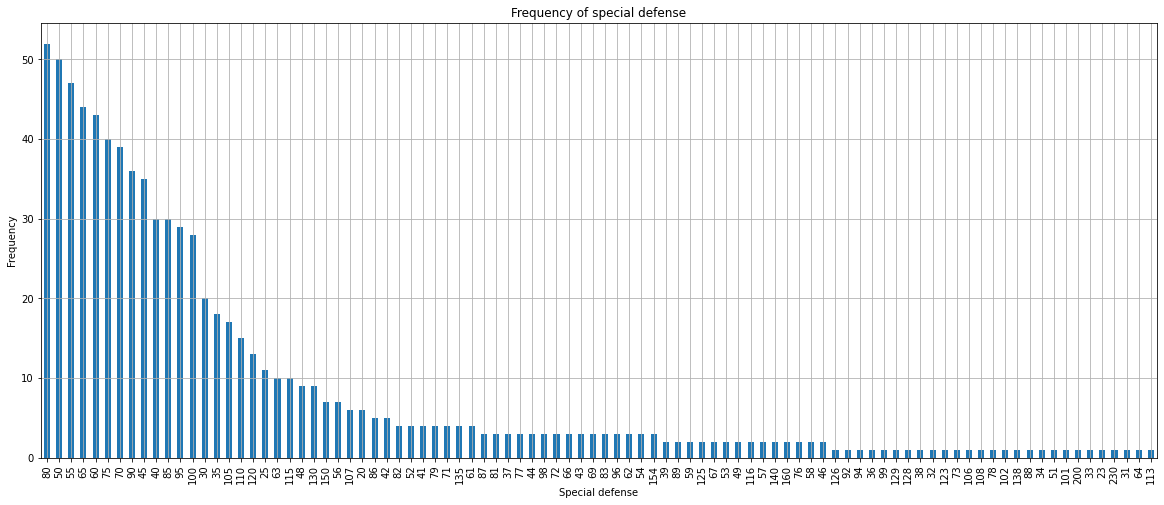

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))
counts = df['Sp. Def'].value_counts(sort=True)
counts.plot(kind='bar')
plt.grid()
plt.title('Frequency of special defense')
plt.xlabel('Special defense')
plt.ylabel('Frequency')
plt.show()

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
Type_Attack = pd.crosstab(df['Attack'],df['Type'])
Type_Attack

Type,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Attack,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,2,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,2
22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
170,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


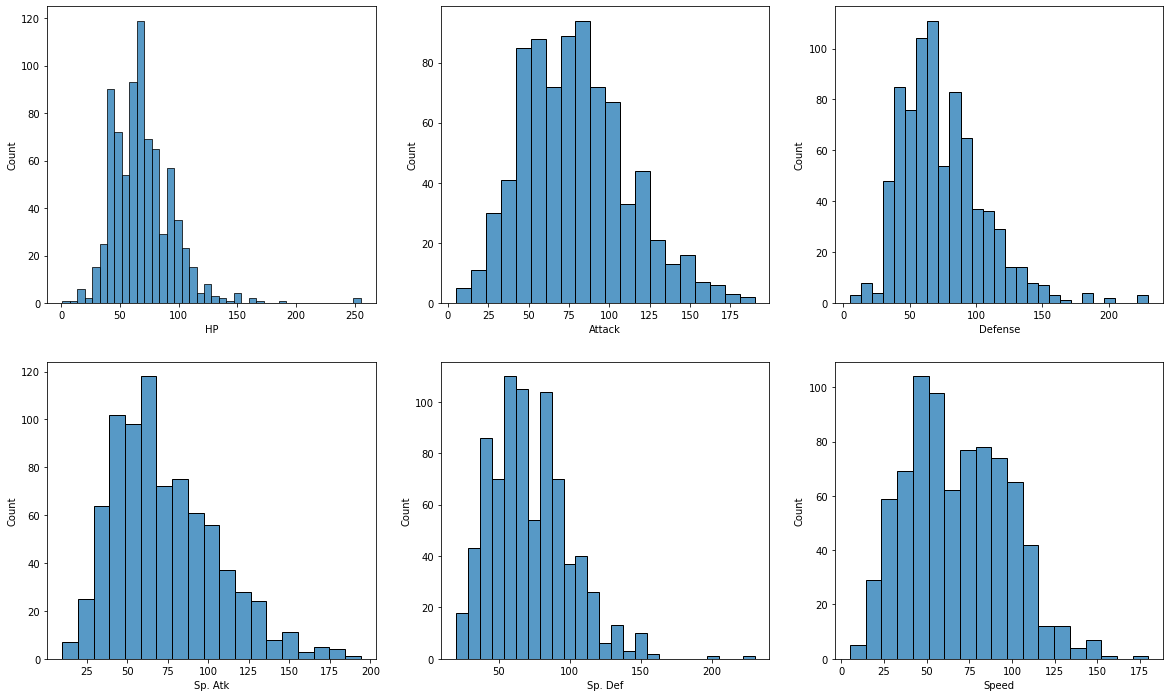

In [31]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,12))

sns.histplot(x='HP',data=df,ax=axes[0,0])
sns.histplot(x='Attack',data=df,ax=axes[0,1])
sns.histplot(x='Defense',data=df,ax=axes[0,2])
sns.histplot(x='Sp. Atk',data=df,ax=axes[1,0])
sns.histplot(x='Sp. Def',data=df,ax=axes[1,1])
sns.histplot(x='Speed',data=df,ax=axes[1,2])
plt.show()